# Bedingungen und Rekursion

### Boolsche Ausdrücke

Wenn wir Situationen in der Programmierung beschreiben, haben wir es oft mit relativ komplexen Boolschen Ausdrücken zu tun. Wir müssen lernen diese zu lesen, verstehen und, wo möglich, zu vereinfachen. 

Ein Beispiel, welches zu einem komplexen boolschen Ausdruck führt ist, wenn wir die Punkte in der folgenden farbigen Fläche charakterisieren möchten

![shape](images/shape.png)

In [1]:
class BooleanExpression {
    public static boolean isInside(double x, double y) {
         // Ihre Lösung
        return true;
    }
    
    public static void main(String[] args) {
        // Ihr Testcode
    }
}
BooleanExpression.main(new String[0]);


#### Miniübung

* Schreiben Sie einen Ausdruck hin, der `true` ergibt, wenn die durch `x` und `y` gegebene Koordinate, innerhalb der farbigen Fläche liegt
    * Testen Sie die Methode `isInside` mit verschiedenen Werten


### Boolsche Algebra

Um komplexe boolsche Ausdrücke zu verwenden, können wir die Regeln von *De-Morgan* verwenden:

    !(A && B) ist gleich !A || !B
    !(A || B) ist gleich !A && !B     

#### Miniübung

* Schreiben Sie ein Programm, welches diese Regeln überprüft. 

In [3]:
class BooleanTest {
    
    public static void testDeMorgan(boolean a, boolean b) {
         // Ihre Lösung
    }

    public static void main(String[] args) {
        // Ihr Testcode
    }
    
}

BooleanTest.main(new String[0]);

De Morgan's Gesetze sind auch hilfreich um Bedingungen mit Relationsoperatoren umzuschreiben. Zum Beispiel kann der Code 
```
if (!(x == 0 || y == 0)) {
    System.out.println("Neither x nor y is zero");
}
```

wie folgt umgeschrieben werden:
```
if (x != 0 && y != 0) {
    System.out.println("Neither x nor y is zero");
}
```

#### Miniübung

* Überlegen Sie sich für jeden Vergleichsoperator was die Negation ist. 

#### Bindung von Operatoren

Bei der Arithmetik kennen wir die Punkt vor Strich-Regel. Gilt so eine Regel auch bei `||`, `&&` und `!`? Experimentieren Sie

In [4]:
false || false && true

false

### Hochhäuser zeichnen

Wir kommen nun zurück auf unsere Zeichnungsaufgabe vom letzten Mal. Wir wollen Hochhäuser zeichnen. Dazu laden wir zuerst wieder die Turtle Bibliothek

In [6]:
%mavenRepo shapemodelling-repo https://shapemodelling.cs.unibas.ch/repo/
%maven ch.unibas.informatik:jturtle:0.7

In [7]:
import static ch.unibas.informatik.jturtle.TurtleCommands.*;
import java.awt.Color;

Der folgende Code zeichent dann ein vierstöckiges Hochhaus. 

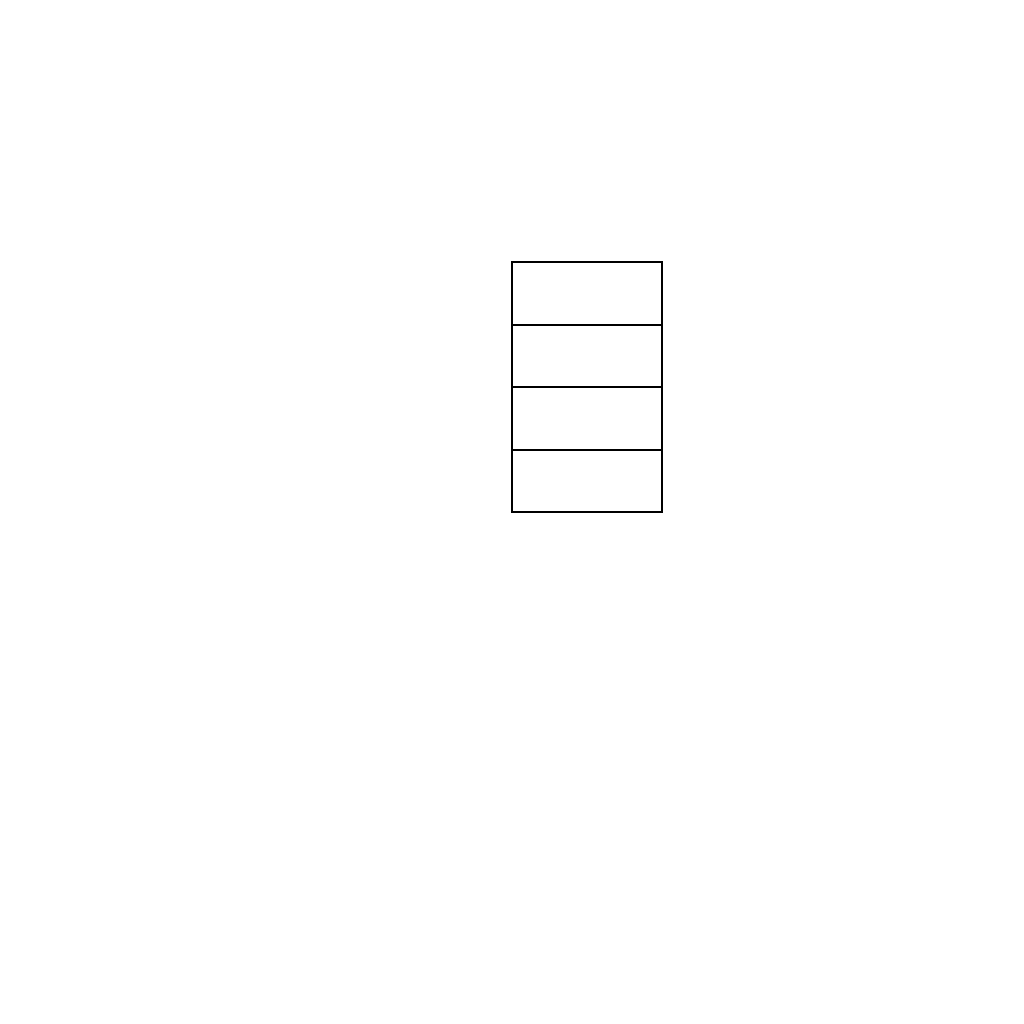

In [8]:
class Building  {
    public static void drawRectangle(double xPos, double yPos, double width, double height) {
        reset(); // set turtle to origin and make it face upwards
        penUp();
        goTo(xPos, yPos);
        penDown();
        
        forward(height);
        turnRight(90);
        forward(width);
        turnRight(90);
        forward(height);
        turnRight(90);
        forward(width);    
    }
    
    
    public static void drawFourStoreyBuilding(double xPos, double yPos, double width, double height) {
        double heightOfStorey = height / 4.0;
        drawRectangle(xPos, yPos, width, heightOfStorey);
        drawRectangle(xPos, yPos + heightOfStorey, width, heightOfStorey);
        drawRectangle(xPos, yPos + 2 * heightOfStorey, width, heightOfStorey);
        drawRectangle(xPos, yPos + 3 * heightOfStorey, width, heightOfStorey);        
    }
    
    public static void main(String[] args) {
        clear();
        drawFourStoreyBuilding(0, 0, 30, 50);
        display(drawing());
    }
    
}

Building.main(new String[0]);

Mit if-Bedingungen können wir nun zwischen verschiednene Hochhäusern unterscheiden, ohne, dass wir jeweils eine komplett neue Methode schreiben müssen. Zum Beispiel können wir Hochhäuser mit und ohne Antenne auf dem Dach schreiben. 

#### Miniübung

* Sie wollen nun zwei Arten von 4-stöckigen Häusern zeichnen, nämlich mit oder ohne Antenne. Dies wollen Sie beim Aufruf der Methode angeben können. Ergänzen Sie die Methode um ein Argument `hasAntenna`. 
* Ergänzen Sie den Code so, dass, alls beim Aufruf gewünscht, eine Antenne gezeichnet wird (zum Beispiel durch einen weiteren Aufruf von drawRectangle)


#### Wiederholungen durch Rekursion ausdrücken

Bisher hatten unsere Methoden eine grosse Einschränkung. Wir konnten immer nur Häuser mit einer fixen Anzahl Stockwerke zeichnen. Dank Rekursion können wir nun auch Methoden schreiben, bei denen man die Anzahl Stockwerke als Parameter angeben kann. 

Die Strategie ist wie folgt:
- mm ein $n$-stöckiges Gebäude zu zeichnen können wir ein Rechteck zeichnen mit einem $n-1$ stöckiges Gebäude oben drafu
- um ein $0$-stöckges Gebäude zu zeichnen müssen wir nichts machen. 

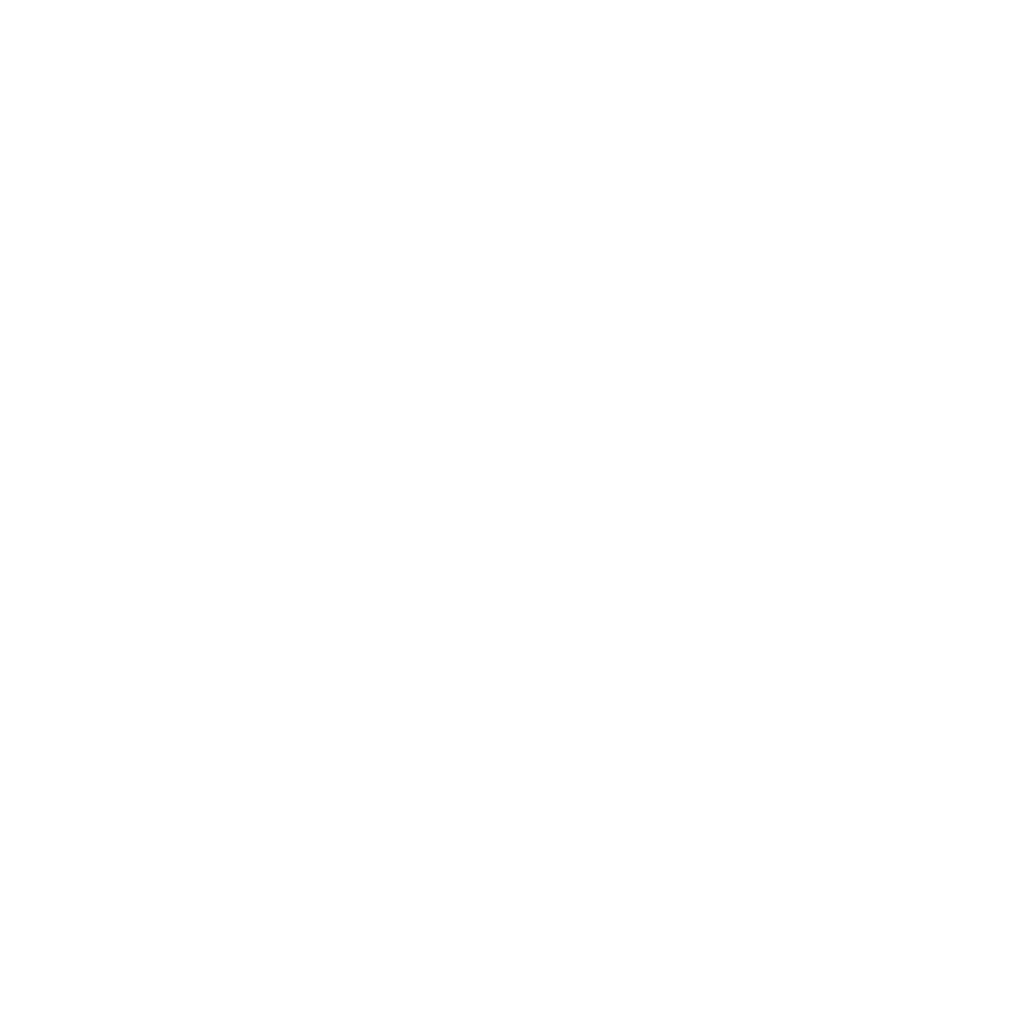

In [9]:
class Building {
    public static void drawRectangle(double xPos, double yPos, double width, double height) {
        reset(); // set turtle to origin and make it face upwards
        penUp();
        goTo(xPos, yPos);
        penDown();
        
        forward(height);
        turnRight(90);
        forward(width);
        turnRight(90);
        forward(height);
        turnRight(90);
        forward(width);    
    }
    
    
    public static void drawNStoreyBuilding(int n, double xPos, double yPos, double width, double heightOfStorey) {
        // Ihre Lösung
    }
    
    public static void main(String[] args) {
        clear();
        drawNStoreyBuilding(5, 0, 0, 30, 10);
        display(drawing());
    }
    
}

Building.main(new String[0]);

#### Miniübungen

* Können Sie mit dieser Strategie ein Programm schreiben, das ein $n$-Eck zeichnet?

### Die Schönheit der Rekursion

Zum Schluss noch etwas Schönes. Wir können mittels Rekursion Fraktale Frafiken zeichnen. Fraktale sind gemoetrische Figuren, die als Teil jeweils wieder dieselbe Figur enthalten. Ein Beispiel dafür ist das Sierpinski Dreick. Diese ist aus drei Dreiecken zusammengesetzt, die selbst wieder aus drei Dreicken bestehen, die selbst wieder aus drei Dreicken bestehen, ....

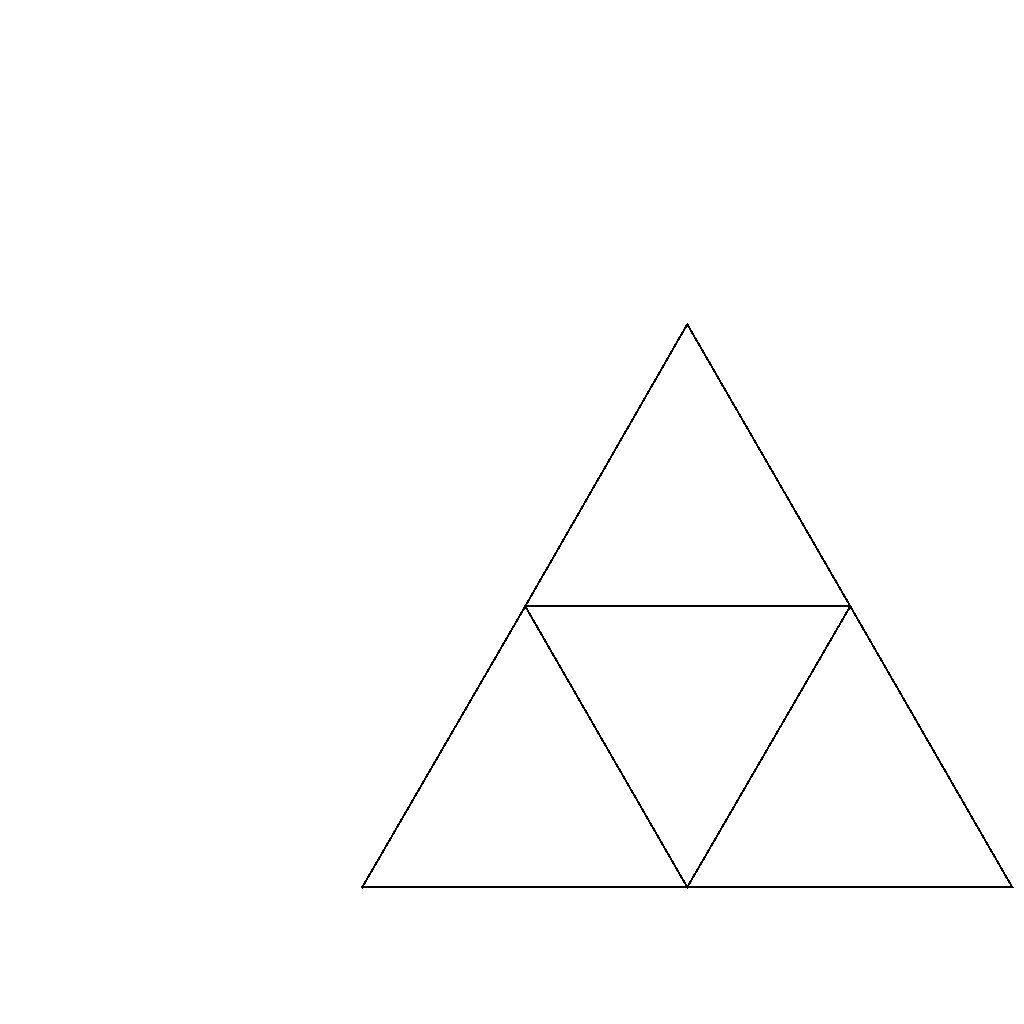

In [15]:
class Sierpinski {
    public static void drawSierpinski(double length, int depth) {
        if (depth==0){
            for (int i = 0; i < 3; i++) {
                forward(length);
                turnLeft(120);
            }
        }
        else {
            drawSierpinski(length/2.0 , depth-1);
            forward(length/2);
            drawSierpinski(length/2.0,depth-1);
            backward(length/2);
            turnLeft(60);
            forward(length/2);
            turnRight(60);
            drawSierpinski(length/2.0,depth-1);
            turnLeft(60);
            backward(length/2);
            turnRight(60);
        }
    }
    
    public static void main(String[] args) {
        home();
        clear();
        penUp();
        goTo(-30, -75);
        turnRight(90);
        penDown();
        drawSierpinski(130, 1);
        display(drawing());
    }
}

Sierpinski.main(new String[0]);


#### Miniübung

* Versuchen Sie den Aufgabe dieser Zeichnung zu verstehen, indem Sie das Dreieck mit unterschiedlichen Rekursionstiefen zeichnen. 